In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import mysql.connector

In [3]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [7]:
#Importing data from Mysql Database

conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Shikhar#8991',
    database = 'e_master_card'
)

In [8]:
df_cust = pd.read_sql("SELECT * FROM customers",conn)
df_cust.head(15)

cust_id               name  gender  age location           occupation  \
0         1      Manya Acharya  Female    2     City       Business Owner   
1         2      Anjali Pandey  Female   47     City           Consultant   
2         3     Aaryan Chauhan    Male   21     City           Freelancer   
3         4         Rudra Bali    Male   24    Rural           Freelancer   
4         5       Advait Malik    Male   48     City           Consultant   
5         6           Arya Das    Male   22     City           Freelancer   
6         7       Avyanna Soni  Female   32   Suburb       Business Owner   
7         8      Yash Vernekar    Male   27     City           Freelancer   
8         9     Vihaan Agarwal    Male   21   Suburb  Fullstack Developer   
9        10   Aditya Choudhary    Male   25    Rural           Freelancer   
10       11  Krishna Singhania    Male   39     City           Accountant   
11       12        Krishna Das    Male   36     City           Accountant   
12       13       Vivaan Batra    Male   24     City           Freelancer   
13       14      Amaira Saxena  Female   26     City       Data Scientist   
14       15      Sanjana Malik  Female   25    Rural               Artist   

    annual_income marital_status  
0          358211        Married  
1           65172         Single  
2           22378        Married  
3           33563        Married  
4           39406        Married  
5           44887        Married  
6          259013        Married  
7          159400        Married  
8           34814         Single  
9           39832        Married  
10          77588        Married  
11          67751        Married  
12          25399        Married  
13         189453        Married  
14              0        Married

In [9]:
df_trans = pd.read_sql("SELECT * FROM transactions",conn)
df_trans.head()


tran_id  cust_id   tran_date  tran_amount  platform   product_category  \
0        1      705  2023-01-01           63  Flipkart        Electronics   
1        2      385  2023-01-01           99   Alibaba  Fashion & Apparel   
2        3      924  2023-01-01          471   Shopify             Sports   
3        4      797  2023-01-01           33   Shopify  Fashion & Apparel   
4        5      482  2023-01-01           68    Amazon  Fashion & Apparel   

  payment_type  
0      Phonepe  
1  Credit Card  
2      Phonepe  
3         Gpay  
4  Net Banking

In [10]:
df_cs = pd.read_sql("SELECT * FROM credit_profiles",conn)
df_cs.head()


cust_id  credit_score  credit_utilisation  outstanding_debt  \
0        1           749            0.585171           19571.0   
1        2           587            0.107928          161644.0   
2        3           544            0.854807             513.0   
3        4           504            0.336938             224.0   
4        5           708            0.586151           18090.0   

   credit_inquiries_last_6_months  credit_limit  
0                             0.0       40000.0  
1                             2.0        1250.0  
2                             4.0        1000.0  
3                             2.0        1000.0  
4                             2.0       40000.0

In [11]:
df_cust.describe()

cust_id          age  annual_income
count  1000.000000  1000.000000    1000.000000
mean    500.500000    36.405000  132439.799000
std     288.819436    15.666155  113706.313793
min       1.000000     1.000000       0.000000
25%     250.750000    26.000000   42229.750000
50%     500.500000    32.000000  107275.000000
75%     750.250000    46.000000  189687.500000
max    1000.000000   135.000000  449346.000000

In [12]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [13]:
# handling null values

In [14]:
df_cust[df_cust.annual_income == 0].head(5) #checking if 0 value have been filled correctly

cust_id               name  gender  age location           occupation  \
14        15      Sanjana Malik  Female   25    Rural               Artist   
82        83  Reyansh Mukherjee    Male   27     City           Freelancer   
97        98         Virat Puri    Male   47   Suburb       Business Owner   
102      103         Aarav Shah    Male   32     City       Data Scientist   
155      156       Kiaan Saxena    Male   24     City  Fullstack Developer   

     annual_income marital_status  
14               0        Married  
82               0         Single  
97               0        Married  
102              0        Married  
155              0        Married

In [15]:
# Print distinct values in the 'occupation' column
distinct_occupations = df_cust["occupation"].unique()
print(distinct_occupations)


['Business Owner' 'Consultant' 'Freelancer' 'Fullstack Developer'
 'Accountant' 'Data Scientist' 'Artist']


In [16]:
df_cust[df_cust.occupation == "Artist"].annual_income.median()

44915.0

In [17]:
df_cust[df_cust.occupation == "Data Scientist"].annual_income.median()

127889.0

In [18]:
df_cust[df_cust.occupation == "Accountant"].annual_income.median()

65265.0

In [19]:
df_cust[df_cust.occupation == "Fullstack Developer"].annual_income.median()

74457.0

In [20]:
occupation_wise_inc_median = df_cust.groupby("occupation")["annual_income"].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [21]:
df_cust.annual_income.median()

107275.0

In [22]:
def get_median_val(row):
    if pd.isnull(row["annual_income"]):
        return occupation_wise_inc_median[row["occupation"]]
    else :
        return row["annual_income"]

In [23]:
get_median_val({"cust_id" : 3245 , "occupation" : "Artist","annual_income":None})

44915.0

In [24]:
df_cust["annual_income"] = df_cust.apply(
    lambda row: occupation_wise_inc_median[row['occupation']] if row["annual_income"] == 0 else row["annual_income"],
    axis=1
)


In [25]:
df_cust.iloc[[14,82]]

cust_id               name  gender  age location  occupation  \
14       15      Sanjana Malik  Female   25    Rural      Artist   
82       83  Reyansh Mukherjee    Male   27     City  Freelancer   

    annual_income marital_status  
14        44915.0        Married  
82        45189.5         Single

## Data Cleaning 

In [27]:
df_cust.describe()

cust_id          age  annual_income
count  1000.000000  1000.000000    1000.000000
mean    500.500000    36.405000  138634.437500
std     288.819436    15.666155  110961.396638
min       1.000000     1.000000       2.000000
25%     250.750000    26.000000   48229.500000
50%     500.500000    32.000000  113416.000000
75%     750.250000    46.000000  192614.000000
max    1000.000000   135.000000  449346.000000

In [28]:
df_cust[df_cust.annual_income < 100]

cust_id            name  gender  age location           occupation  \
31        32     Veer Mistry    Male   50     City       Business Owner   
262      263   Vivaan Tandon    Male   53   Suburb       Business Owner   
316      317   Yuvraj Saxena    Male   47     City           Consultant   
333      334    Avani Khanna  Female   29     City       Data Scientist   
340      341     Priya Sinha  Female   33    Rural  Fullstack Developer   
543      544    Advait Batra    Male   54     City           Consultant   
592      593    Priya Gandhi  Female   32     City       Business Owner   
633      634   Rudra Mehtani    Male   26     City       Data Scientist   
686      687  Vihaan Jaiswal    Male   40     City       Business Owner   
696      697      Ishan Negi    Male   47     City           Consultant   

     annual_income marital_status  
31            50.0        Married  
262           50.0        Married  
316           50.0        Married  
333           50.0        Married  
340           50.0        Married  
543            2.0        Married  
592           50.0        Married  
633            2.0        Married  
686            2.0        Married  
696           20.0        Married

In [29]:
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [30]:
df_cust.at[0,"name"]  # it will print values according to the indexes

'Manya Acharya'

In [31]:
df_cust.head()

cust_id            name  gender  age location      occupation  \
0        1   Manya Acharya  Female    2     City  Business Owner   
1        2   Anjali Pandey  Female   47     City      Consultant   
2        3  Aaryan Chauhan    Male   21     City      Freelancer   
3        4      Rudra Bali    Male   24    Rural      Freelancer   
4        5    Advait Malik    Male   48     City      Consultant   

   annual_income marital_status  
0       358211.0        Married  
1        65172.0         Single  
2        22378.0        Married  
3        33563.0        Married  
4        39406.0        Married

In [32]:
# replacing outlier i.e annual_incone less than 100 by median income

for index , row in df_cust.iterrows():
    if row["annual_income"] < 100 :
        df_cust.at[index , "annual_income"] = occupation_wise_inc_median[row["occupation"]]


In [33]:
df_cust[df_cust.annual_income < 100]  # verifying after above operation

Empty DataFrame
Columns: [cust_id, name, gender, age, location, occupation, annual_income, marital_status]
Index: []

In [34]:
df_cust.loc[[31,316]] # verifying if outliers are replaced by median values

cust_id           name gender  age location      occupation  \
31        32    Veer Mistry   Male   50     City  Business Owner   
316      317  Yuvraj Saxena   Male   47     City      Consultant   

     annual_income marital_status  
31        254881.0        Married  
316        51175.0        Married

In [35]:
avg_income_per_occupation = df_cust.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45239.842105
Business Owner         268119.833910
Consultant              59927.257732
Data Scientist         136208.603261
Freelancer              76293.089912
Fullstack Developer     78618.385135
Name: annual_income, dtype: float64

In [36]:
avg_income_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [37]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45239.84210526, 268119.83391003,  59927.25773196,
       136208.60326087,  76293.08991228,  78618.38513514])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Accountant'),
  Text(1, 0, 'Artist'),
  Text(2, 0, 'Business Owner'),
  Text(3, 0, 'Consultant'),
  Text(4, 0, 'Data Scientist'),
  Text(5, 0, 'Freelancer'),
  Text(6, 0, 'Fullstack Developer')])

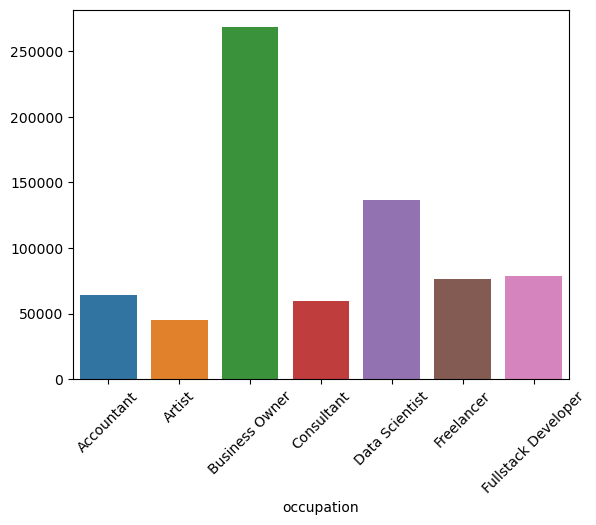

In [38]:
sns.barplot(x = avg_income_per_occupation.index , y = avg_income_per_occupation.values) , #palette = "tab10"
plt.xticks(rotation = 45)

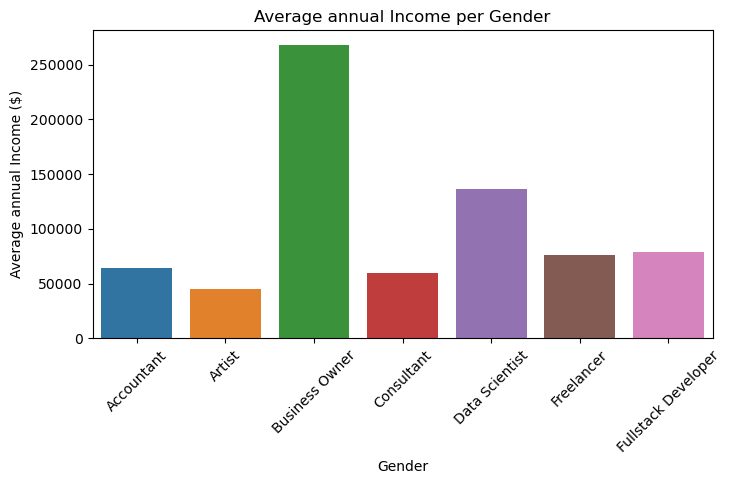

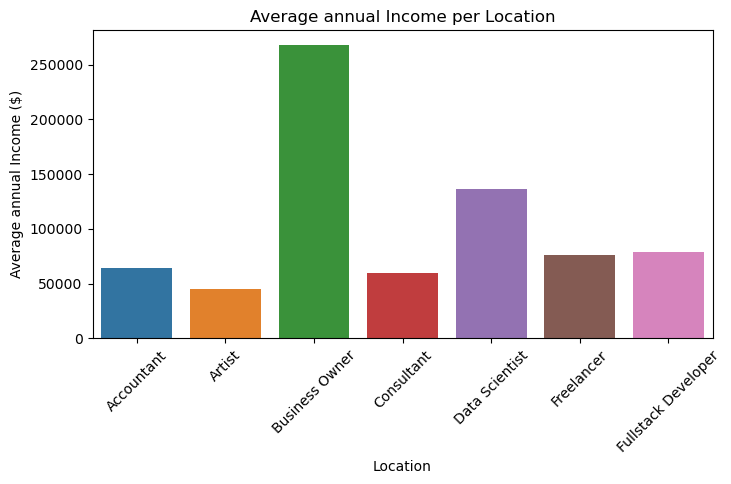

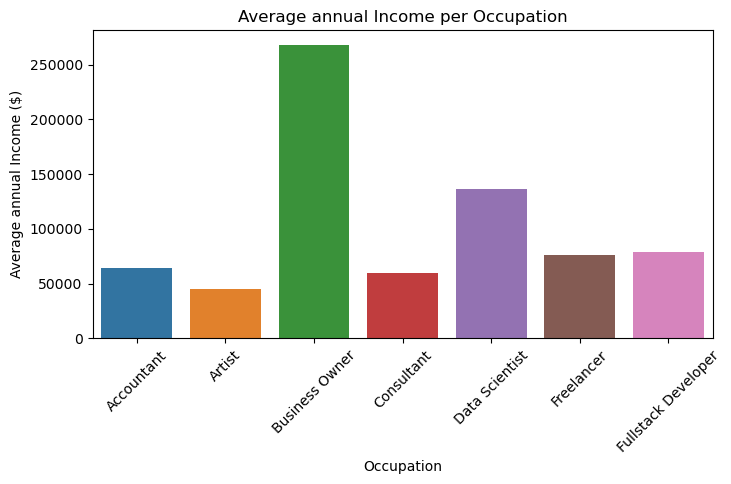

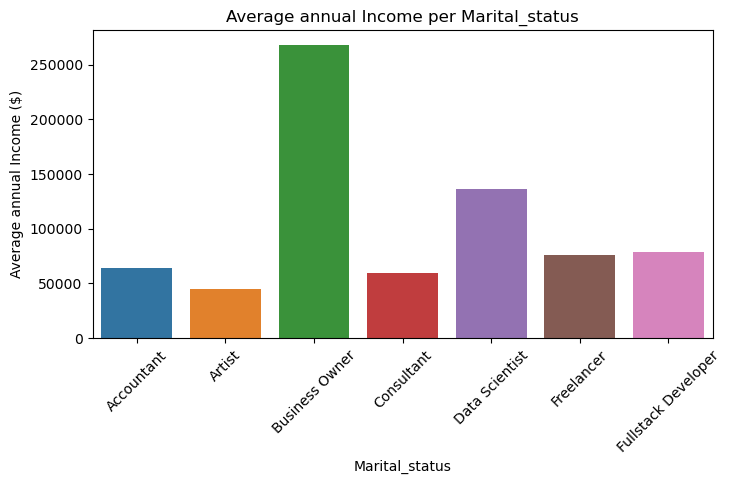

In [39]:
categorical_columns = ['gender', 'location' , 'occupation', 'marital_status']

for col in categorical_columns : 
    plt.figure(figsize = (8,4))
    avg_income_per_grp = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x = avg_income_per_occupation.index , y = avg_income_per_occupation.values , palette = "tab10")
    plt.xticks(rotation = 45)
    plt.title (f'Average annual Income per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average annual Income ($)')
    plt.show()

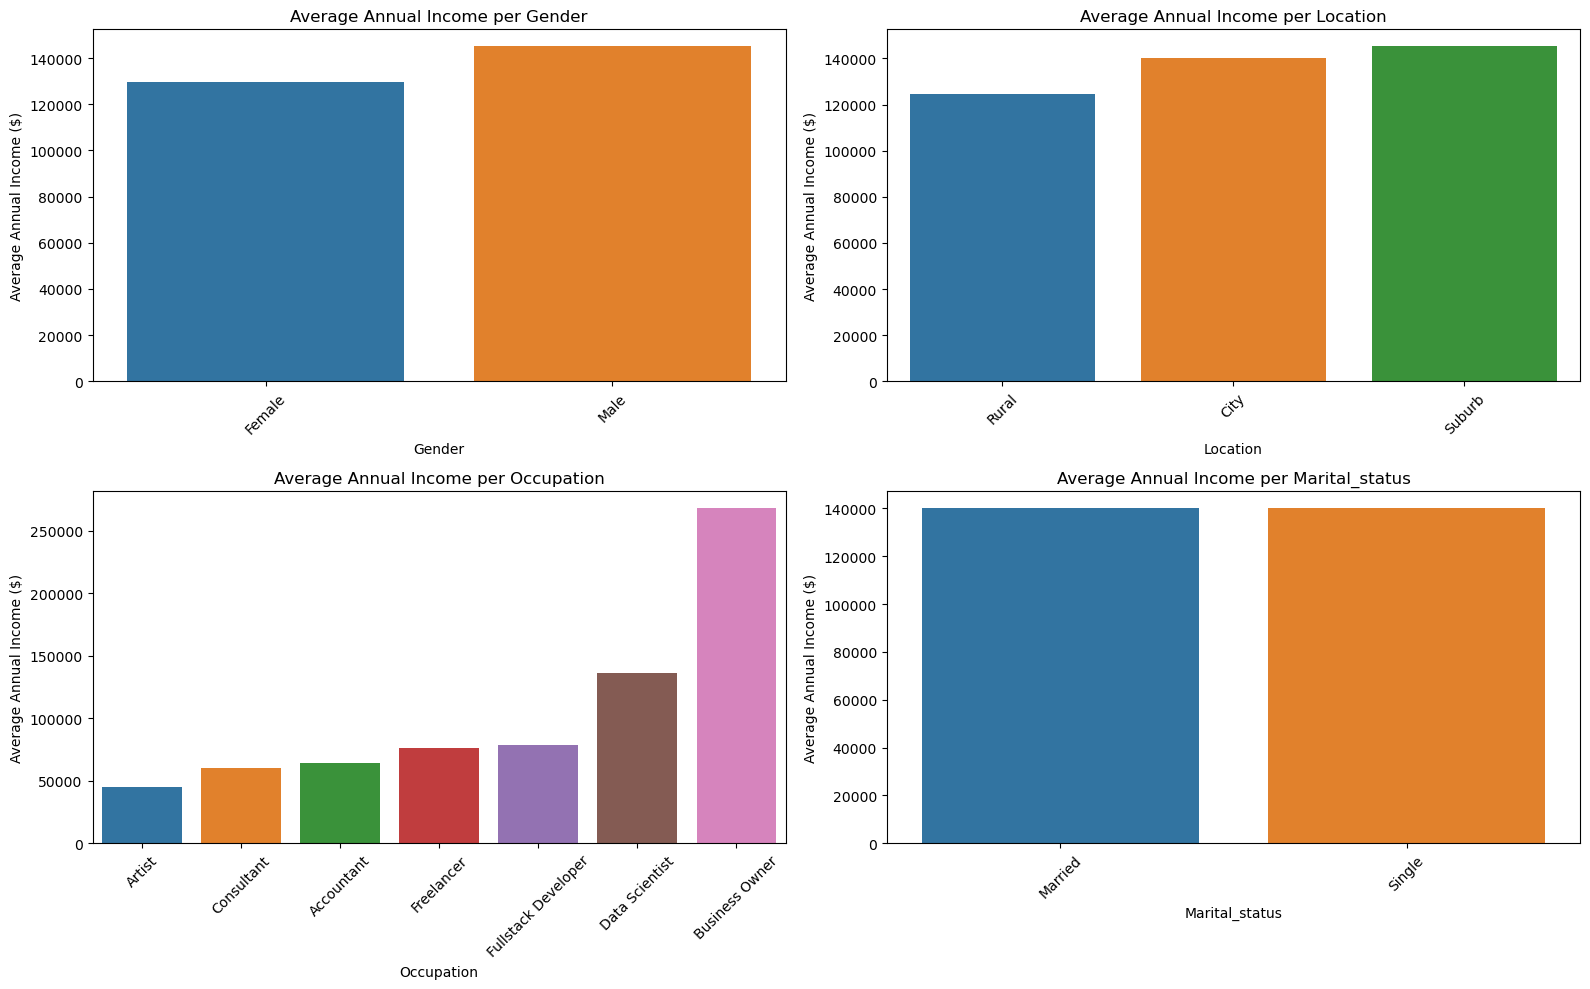

In [41]:
# Define the categorical columns
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

# Set the figure size and number of subplots (2x2 grid in this case)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each categorical column and corresponding axis
for i, col in enumerate(categorical_columns): 
    # Calculate the average income per group for each categorical variable
    avg_income_per_grp = df_cust.groupby(col)['annual_income'].mean().sort_values()
    
    # Create barplot in the corresponding subplot
    sns.barplot(x=avg_income_per_grp.index, y=avg_income_per_grp.values, palette="tab10", ax=axes[i])
    
    # Rotate the x-axis labels for readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    
    # Set title and labels
    axes[i].set_title(f'Average Annual Income per {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Average Annual Income ($)')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Display the plots
plt.show()

## Checking the age columns

Handling null values 

In [44]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [45]:
# Check for zero values in each column
(df_cust == 0).sum()


cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [46]:
df_cust

cust_id              name  gender  age location           occupation  \
0          1     Manya Acharya  Female    2     City       Business Owner   
1          2     Anjali Pandey  Female   47     City           Consultant   
2          3    Aaryan Chauhan    Male   21     City           Freelancer   
3          4        Rudra Bali    Male   24    Rural           Freelancer   
4          5      Advait Malik    Male   48     City           Consultant   
..       ...               ...     ...  ...      ...                  ...   
995      996    Manya Vasudeva  Female   26     City           Freelancer   
996      997      Aarav Dhawan    Male   55     City       Business Owner   
997      998         Rehan Jha    Male   29     City  Fullstack Developer   
998      999     Amara Rathore  Female   47     City       Business Owner   
999     1000  Akshay Choudhary    Male   28     City           Freelancer   

     annual_income marital_status  
0         358211.0        Married  
1          65172.0         Single  
2          22378.0        Married  
3          33563.0        Married  
4          39406.0        Married  
..             ...            ...  
995        45189.5        Married  
996       290061.0         Single  
997       139141.0        Married  
998       254881.0        Married  
999       226873.0        Married  

[1000 rows x 8 columns]

In [47]:
df_cust[df_cust['age'] > 80].count()

cust_id           13
name              13
gender            13
age               13
location          13
occupation        13
annual_income     13
marital_status    13
dtype: int64

In [48]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

(array([  7.,   0.,   0.,  15., 131., 166., 191.,  94., 104.,  37.,  86.,
         51.,  49.,  43.,  13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   9.,   0.,   0.,   0.,   0.,   4.]),
 array([  1.        ,   5.46666667,   9.93333333,  14.4       ,
         18.86666667,  23.33333333,  27.8       ,  32.26666667,
         36.73333333,  41.2       ,  45.66666667,  50.13333333,
         54.6       ,  59.06666667,  63.53333333,  68.        ,
         72.46666667,  76.93333333,  81.4       ,  85.86666667,
         90.33333333,  94.8       ,  99.26666667, 103.73333333,
        108.2       , 112.66666667, 117.13333333, 121.6       ,
        126.06666667, 130.53333333, 135.        ]),
 <BarContainer object of 30 artists>)

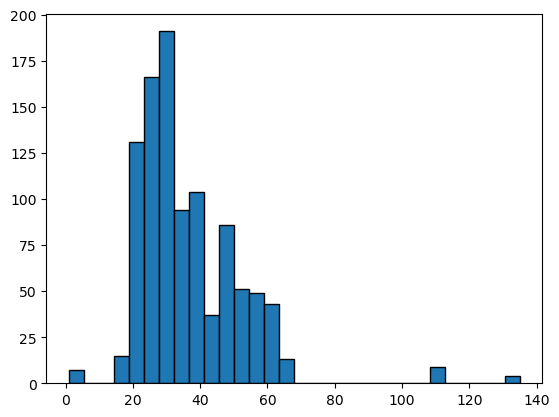

In [49]:
plt.hist(df_cust.age , bins = 30 , edgecolor = "black")

In [50]:
df_cust_age_out = df_cust[(df_cust.age<15) | (df_cust.age > 80)]
df_cust_age_out

cust_id             name  gender  age location           occupation  \
0          1    Manya Acharya  Female    2     City       Business Owner   
41        42      Aaryan Shah    Male  110     City               Artist   
165      166        Sia Dutta  Female    1     City           Freelancer   
174      175     Rohan Sharma    Male  110     City           Freelancer   
222      223      Arjun Batra    Male  110   Suburb           Freelancer   
277      278     Aarav Tandon    Male  110     City           Consultant   
295      296     Ayush Pandey    Male    1    Rural           Accountant   
325      326       Virat Goel    Male  110     City           Accountant   
610      611      Rehan Verma    Male  135    Rural       Business Owner   
692      693        Dhruv Jha    Male    1     City       Business Owner   
703      704     Aanya Sharma  Female  110     City           Freelancer   
709      710      Anika Verma  Female  110     City       Data Scientist   
728      729      Rehan Yadav    Male  135     City       Business Owner   
832      833        Ridhi Raj  Female  110     City  Fullstack Developer   
845      846    Rohan Jaiswal    Male    1     City           Consultant   
855      856     Aanya Taneja  Female    2     City  Fullstack Developer   
895      896  Krishna Goswami    Male    1     City           Freelancer   
923      924      Kunal Patel    Male  110     City           Freelancer   
951      952     Virat Shetty    Male  135     City       Data Scientist   
991      992        Arya Dube    Male  135     City  Fullstack Developer   

     annual_income marital_status  
0         358211.0        Married  
41          7621.0        Married  
165        39721.0         Single  
174        23723.0        Married  
222       210987.0        Married  
277        96522.0         Single  
295        55254.0        Married  
325        61021.0         Single  
610       444776.0        Married  
692        83045.0        Married  
703        43404.0         Single  
709        98417.0        Married  
728       382836.0        Married  
832        95379.0         Single  
845        20838.0        Married  
855        30689.0        Married  
895        31533.0        Married  
923        51629.0        Married  
951        49677.0        Married  
991        93267.0         Single

In [51]:
df_cust.age.median()

32.0

In [52]:
median_age_per_occupation = df_cust.groupby("occupation")["age"].median()
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [53]:
for index , row in df_cust_age_out.iterrows():
    df_cust.at[index,'age'] = median_age_per_occupation[row['occupation']]

In [54]:
df_cust[(df_cust.age<15) | (df_cust.age > 80)]

Empty DataFrame
Columns: [cust_id, name, gender, age, location, occupation, annual_income, marital_status]
Index: []

In [55]:
df_cust.describe()

cust_id          age  annual_income
count  1000.000000  1000.000000    1000.000000
mean    500.500000    35.541500  140137.395500
std     288.819436    12.276634  110450.464107
min       1.000000    18.000000    5175.000000
25%     250.750000    26.000000   49620.500000
50%     500.500000    32.000000  115328.000000
75%     750.250000    44.250000  195514.250000
max    1000.000000    64.000000  449346.000000

## Visualization 

In [57]:
df_cust.head()

cust_id            name  gender   age location      occupation  \
0        1   Manya Acharya  Female  51.0     City  Business Owner   
1        2   Anjali Pandey  Female  47.0     City      Consultant   
2        3  Aaryan Chauhan    Male  21.0     City      Freelancer   
3        4      Rudra Bali    Male  24.0    Rural      Freelancer   
4        5    Advait Malik    Male  48.0     City      Consultant   

   annual_income marital_status  
0       358211.0        Married  
1        65172.0         Single  
2        22378.0        Married  
3        33563.0        Married  
4        39406.0        Married

In [60]:
bin_edges = [17,25,48,65]
bin_labels = ['18-25','26-48','49-65']
pd.cut(df_cust['age'] , bins = bin_edges , labels = bin_labels)

0      49-65
1      26-48
2      18-25
3      18-25
4      26-48
       ...  
995    26-48
996    49-65
997    26-48
998    26-48
999    26-48
Name: age, Length: 1000, dtype: category
Categories (3, object): ['18-25' < '26-48' < '49-65']

In [61]:
# Define a dictionary with ranges as keys
age_bins = {
    '18-25': range(18, 26),
    '26-48': range(26, 49),
    '49-65': range(49, 66)
}

# Function to map age to a bin
def map_age_to_bin(age):
    for label, age_range in age_bins.items():
        if age in age_range:
            return label
    return None

# Apply the function to create the age group column
df_cust['age_group'] = df_cust['age'].apply(map_age_to_bin)
df_cust['age_group']

0      49-65
1      26-48
2      18-25
3      18-25
4      26-48
       ...  
995    26-48
996    49-65
997    26-48
998    26-48
999    26-48
Name: age_group, Length: 1000, dtype: object

In [62]:
# Summary of Different Methods:
# pd.cut(): Direct binning based on specified ranges and labels.
# np.digitize(): Bins values based on edges and then manually assigns labels.
# apply() with a custom function: Manually checks age ranges and assigns labels.
# pd.qcut(): Divides data into quantile-based bins (equal frequency bins).
# np.select(): Uses conditional statements to bin values.
# Dictionary mapping: Maps age values to labels based on predefined ranges.

In [63]:
df_cust.head()

cust_id            name  gender   age location      occupation  \
0        1   Manya Acharya  Female  51.0     City  Business Owner   
1        2   Anjali Pandey  Female  47.0     City      Consultant   
2        3  Aaryan Chauhan    Male  21.0     City      Freelancer   
3        4      Rudra Bali    Male  24.0    Rural      Freelancer   
4        5    Advait Malik    Male  48.0     City      Consultant   

   annual_income marital_status age_group  
0       358211.0        Married     49-65  
1        65172.0         Single     26-48  
2        22378.0        Married     18-25  
3        33563.0        Married     18-25  
4        39406.0        Married     26-48

In [64]:
age_group_counts = df_cust.age_group.value_counts(normalize = True)*100
age_group_counts

age_group
26-48    56.482412
18-25    24.723618
49-65    18.793970
Name: proportion, dtype: float64

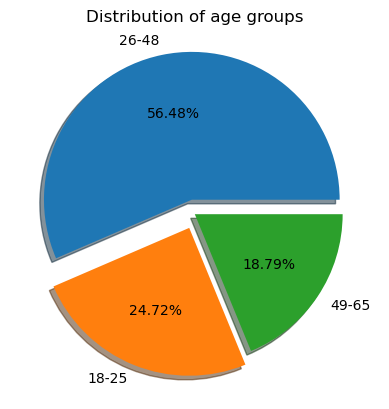

In [65]:
plt.pie(
    age_group_counts , 
    labels = age_group_counts.index , 
    autopct = '%1.2f%%' ,
    shadow = True , 
    explode = (0.1,0.1,0)

)
plt.title('Distribution of age groups')
plt.show() #here autopct will show decimal values based on number provided

In [67]:
df_cust.head()

cust_id            name  gender   age location      occupation  \
0        1   Manya Acharya  Female  51.0     City  Business Owner   
1        2   Anjali Pandey  Female  47.0     City      Consultant   
2        3  Aaryan Chauhan    Male  21.0     City      Freelancer   
3        4      Rudra Bali    Male  24.0    Rural      Freelancer   
4        5    Advait Malik    Male  48.0     City      Consultant   

   annual_income marital_status age_group  
0       358211.0        Married     49-65  
1        65172.0         Single     26-48  
2        22378.0        Married     18-25  
3        33563.0        Married     18-25  
4        39406.0        Married     26-48

In [68]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [69]:
df_cust.gender.value_counts( normalize = True) * 100

gender
Male      67.4
Female    32.6
Name: proportion, dtype: float64

In [70]:
customer_location_gender = df_cust.groupby(['location','gender']).size().unstack()
customer_location_gender

gender    Female  Male
location              
City         226   457
Rural         26    59
Suburb        74   158

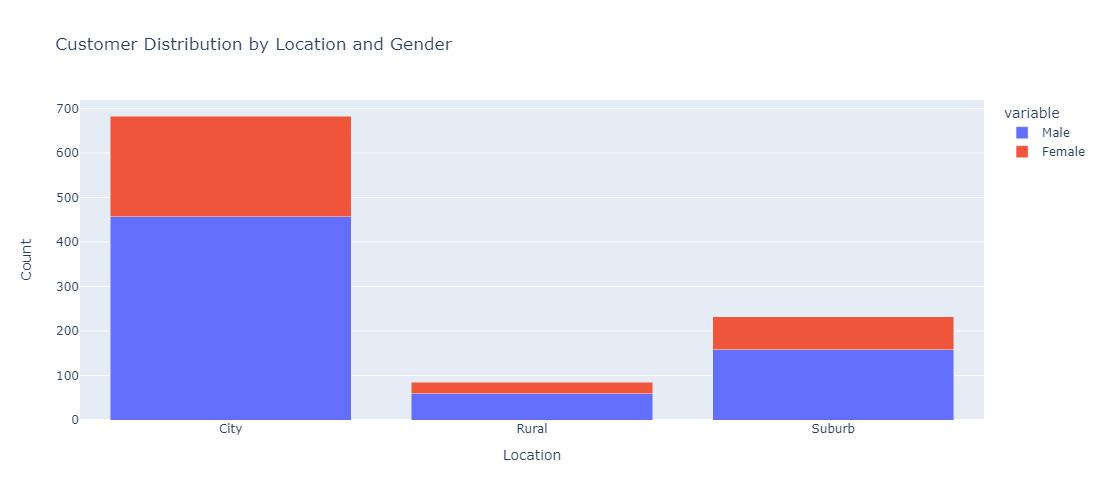

In [71]:
import plotly.express as px

# Rename the index and assign it as a column
customer_location_gender.index.name = 'Location'
df_plot = customer_location_gender.reset_index()

# Plot using the renamed column
fig = px.bar(df_plot, 
             x='Location', 
             y=['Male', 'Female'], 
             title="Customer Distribution by Location and Gender",
             labels={'value': 'Count', 'Location': 'Location'},
             barmode='stack')

fig.update_layout(width=900, height=500)
fig.show()


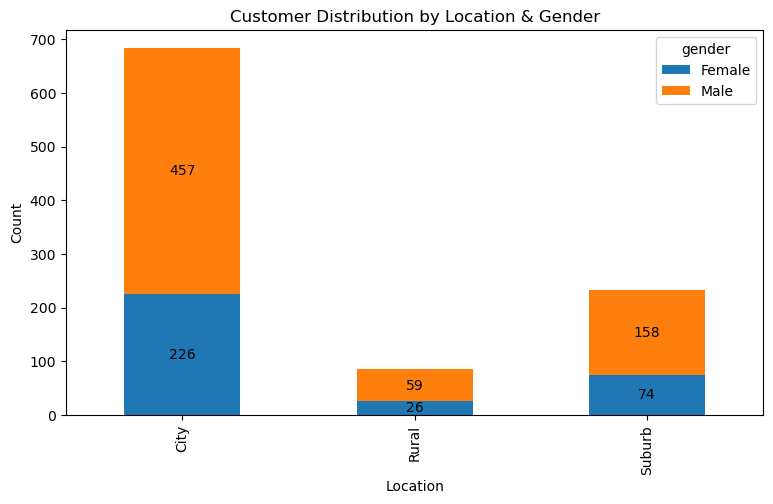

In [72]:
import matplotlib.pyplot as plt

# Plot the stacked bar chart and capture the axes object (ax)
ax = customer_location_gender.plot(kind="bar", stacked=True, figsize=(9, 5))

# Set the title and labels
plt.title('Customer Distribution by Location & Gender')
plt.xlabel('Location')
plt.ylabel('Count')

# Loop over each container (i.e., the stacked parts of the bars)
for container in ax.containers:
    # Add value labels for each part of the stack (i.e., per gender segment)
    ax.bar_label(container, label_type='center')  # 'center' places the label in the middle of each bar segment

# Show the plot
plt.show()


## DATA CLEANING

In [74]:
#EXPLORE CREDIT SCORE TABLE

In [75]:
df_cs.head()

cust_id  credit_score  credit_utilisation  outstanding_debt  \
0        1           749            0.585171           19571.0   
1        2           587            0.107928          161644.0   
2        3           544            0.854807             513.0   
3        4           504            0.336938             224.0   
4        5           708            0.586151           18090.0   

   credit_inquiries_last_6_months  credit_limit  
0                             0.0       40000.0  
1                             2.0        1250.0  
2                             4.0        1000.0  
3                             2.0        1000.0  
4                             2.0       40000.0

In [76]:
df_cs.shape

(1004, 6)

In [77]:
df_cs['cust_id'].nunique() #to check distinct values

1000

In [78]:
df_cs[df_cs['cust_id'].duplicated(keep = False)] #checking duplicate values

cust_id  credit_score  credit_utilisation  outstanding_debt  \
516      517           308                 NaN               NaN   
517      517           308            0.113860              33.0   
569      569           344                 NaN               NaN   
570      569           344            0.112599              37.0   
607      606           734                 NaN               NaN   
608      606           734            0.193418            4392.0   
664      662           442                 NaN               NaN   
665      662           442            0.856039             266.0   

     credit_inquiries_last_6_months  credit_limit  
516                             NaN           NaN  
517                             3.0         500.0  
569                             NaN           NaN  
570                             0.0         500.0  
607                             NaN           NaN  
608                             1.0       40000.0  
664                             NaN           NaN  
665                             2.0         500.0

In [79]:
df_cs_clean_1 = df_cs.drop_duplicates (subset = "cust_id" , keep = "last")
df_cs_clean_1

cust_id  credit_score  credit_utilisation  outstanding_debt  \
0           1           749            0.585171           19571.0   
1           2           587            0.107928          161644.0   
2           3           544            0.854807             513.0   
3           4           504            0.336938             224.0   
4           5           708            0.586151           18090.0   
...       ...           ...                 ...               ...   
999       996           564            0.702963             688.0   
1000      997           774            0.465462           17139.0   
1001      998           529            0.585856             386.0   
1002      999           725            0.249670            6973.0   
1003     1000           775            0.696050           33956.0   

      credit_inquiries_last_6_months  credit_limit  
0                                0.0       40000.0  
1                                2.0        1250.0  
2                                4.0        1000.0  
3                                2.0        1000.0  
4                                2.0       40000.0  
...                              ...           ...  
999                              2.0        1250.0  
1000                             0.0       60000.0  
1001                             3.0        1000.0  
1002                             2.0       40000.0  
1003                             1.0       60000.0  

[1000 rows x 6 columns]

In [80]:
df_cs_clean_1[df_cs_clean_1['cust_id'].duplicated(keep = False)]

Empty DataFrame
Columns: [cust_id, credit_score, credit_utilisation, outstanding_debt, credit_inquiries_last_6_months, credit_limit]
Index: []

In [81]:
df_cs_clean_1.isnull().sum()  #treating null values

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [82]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()] # checking rows which have null values

cust_id  credit_score  credit_utilisation  outstanding_debt  \
10        11           679            0.557450            9187.0   
35        36           790            0.112535            4261.0   
37        38           514            0.296971             238.0   
45        46           761            0.596041           24234.0   
64        65           734            0.473715           13631.0   
..       ...           ...                 ...               ...   
912      909           479            0.487555             320.0   
931      928           311            0.832244             316.0   
948      945           526            0.272734             227.0   
954      951           513            0.175914             131.0   
957      954           783            0.867421           46451.0   

     credit_inquiries_last_6_months  credit_limit  
10                              2.0           NaN  
35                              1.0           NaN  
37                              2.0           NaN  
45                              2.0           NaN  
64                              0.0           NaN  
..                              ...           ...  
912                             3.0           NaN  
931                             2.0           NaN  
948                             1.0           NaN  
954                             3.0           NaN  
957                             0.0           NaN  

[65 rows x 6 columns]

In [83]:
df_cs_clean_1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


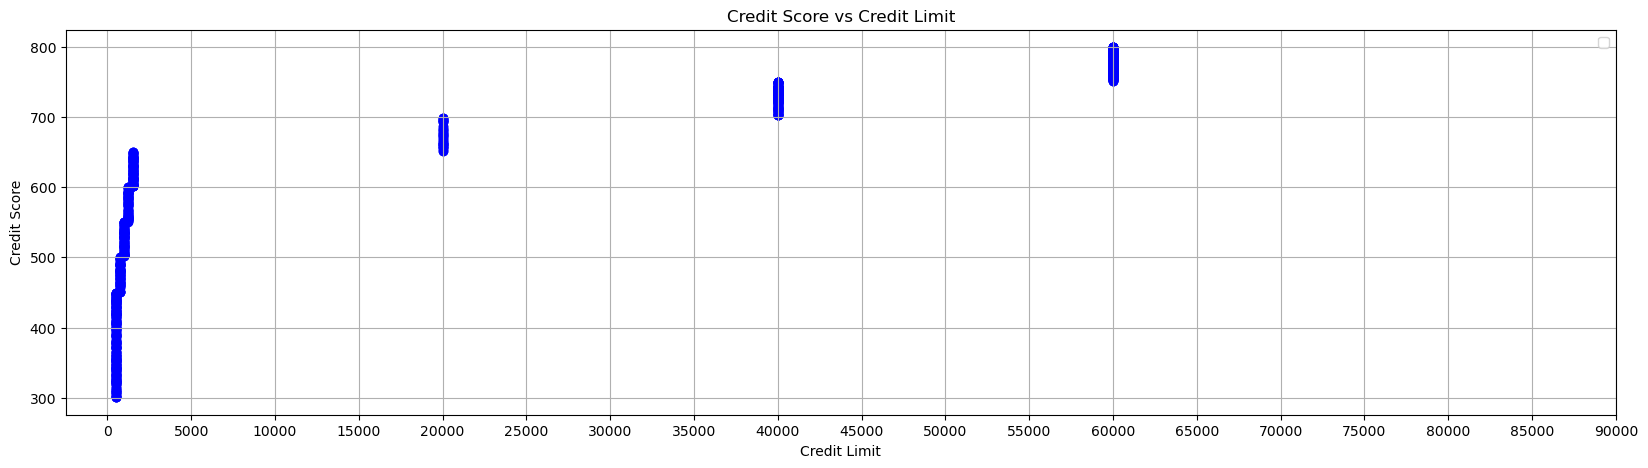

In [84]:
plt.figure(figsize = (20,5))
plt.scatter( x = df_cs_clean_1.credit_limit , y =  df_cs_clean_1.credit_score , c= 'blue',marker = 'o')
plt.title('Credit Score vs Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')

#Adjust the y-axis bin interval to 1000
plt.xticks(range(0, 90001 , 5000))
plt.grid(True)

plt.legend()
plt.show()

In [85]:
bin_ranges = [300,450,500,550,600,650,700,750,800]
bin_labels = [f'{start}-{end - 1}' for start , end in zip(bin_ranges , bin_ranges[1:]) ]
df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1['credit_score'] , bins = bin_ranges , labels = bin_labels)

In [86]:
df_cs_clean_1.head()

cust_id  credit_score  credit_utilisation  outstanding_debt  \
0        1           749            0.585171           19571.0   
1        2           587            0.107928          161644.0   
2        3           544            0.854807             513.0   
3        4           504            0.336938             224.0   
4        5           708            0.586151           18090.0   

   credit_inquiries_last_6_months  credit_limit credit_score_range  
0                             0.0       40000.0            700-749  
1                             2.0        1250.0            550-599  
2                             4.0        1000.0            500-549  
3                             2.0        1000.0            500-549  
4                             2.0       40000.0            700-749

In [87]:
mode_df = df_cs_clean_1.groupby("credit_score_range")["credit_limit"].agg(lambda x : x.mode().iloc[0]).reset_index() 
mode_df
# iloc[0] is provided as we want to get the 1 st value when we get 2 same value

credit_score_range  credit_limit
0            300-449         500.0
1            450-499         750.0
2            500-549        1000.0
3            550-599        1250.0
4            600-649        1500.0
5            650-699       20000.0
6            700-749       40000.0
7            750-799       60000.0

In [88]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()].sample(3)

cust_id  credit_score  credit_utilisation  outstanding_debt  \
856      853           497            0.873269             416.0   
705      702           769            0.887919           37308.0   
802      799           508            0.255638             168.0   

     credit_inquiries_last_6_months  credit_limit credit_score_range  
856                             3.0           NaN            450-499  
705                             4.0           NaN            750-799  
802                             2.0           NaN            500-549

In [89]:
df_cs_clean_1.shape

(1000, 7)

In [90]:
df_cs_clean_2 = pd.merge(df_cs_clean_1 , mode_df , on = "credit_score_range" , suffixes = ("","_mode") , how = "left")
df_cs_clean_2

cust_id  credit_score  credit_utilisation  outstanding_debt  \
0          1           749            0.585171           19571.0   
1          2           587            0.107928          161644.0   
2          3           544            0.854807             513.0   
3          4           504            0.336938             224.0   
4          5           708            0.586151           18090.0   
..       ...           ...                 ...               ...   
995      996           564            0.702963             688.0   
996      997           774            0.465462           17139.0   
997      998           529            0.585856             386.0   
998      999           725            0.249670            6973.0   
999     1000           775            0.696050           33956.0   

     credit_inquiries_last_6_months  credit_limit credit_score_range  \
0                               0.0       40000.0            700-749   
1                               2.0        1250.0            550-599   
2                               4.0        1000.0            500-549   
3                               2.0        1000.0            500-549   
4                               2.0       40000.0            700-749   
..                              ...           ...                ...   
995                             2.0        1250.0            550-599   
996                             0.0       60000.0            750-799   
997                             3.0        1000.0            500-549   
998                             2.0       40000.0            700-749   
999                             1.0       60000.0            750-799   

     credit_limit_mode  
0              40000.0  
1               1250.0  
2               1000.0  
3               1000.0  
4              40000.0  
..                 ...  
995             1250.0  
996            60000.0  
997             1000.0  
998            40000.0  
999            60000.0  

[1000 rows x 8 columns]

In [91]:
df_cs_clean_2.shape

(1000, 8)

In [92]:
df_cs_clean_3 = df_cs_clean_2.copy()
df_cs_clean_3['credit_limit'].fillna(df_cs_clean_2['credit_limit_mode'] , inplace = True)
df_cs_clean_3.shape

(1000, 8)

In [93]:
df_cs_clean_3[df_cs_clean_3.credit_limit.isnull()].head()

cust_id  credit_score  credit_utilisation  outstanding_debt  \
676      677           300            0.785509             341.0   

     credit_inquiries_last_6_months  credit_limit credit_score_range  \
676                             1.0           NaN                NaN   

     credit_limit_mode  
676                NaN

In [94]:
# Temporarily display all rows (change max_rows to None for unlimited rows)
pd.set_option('display.max_rows', None)

# Now, view the filtered DataFrame i.e customers having credit score less than 400
df_cs_clean_3[df_cs_clean_3.credit_score < 400]

cust_id  credit_score  credit_utilisation  outstanding_debt  \
15        16           347            0.531660             190.0   
20        21           381            0.714710             307.0   
22        23           371            0.886790             248.0   
33        34           396            0.257830             109.0   
42        43           397            0.629177             282.0   
49        50           357            0.763378             233.0   
61        62           356            0.497414             185.0   
62        63           344            0.444594             182.0   
65        66           334            0.747272             286.0   
67        68           388            0.138305              59.0   
70        71           303            0.436864             184.0   
72        73           323            0.858835             216.0   
75        76           390            0.496011             175.0   
77        78           349            0.163385              47.0   
91        92           311            0.561702             215.0   
115      116           315            0.298435             107.0   
116      117           372            0.604427             252.0   
125      126           320            0.496316             192.0   
128      129           302            0.617242             221.0   
130      131           323            0.377164             137.0   
131      132           340            0.403258             128.0   
133      134           328            0.214826              90.0   
141      142           323            0.441035             163.0   
142      143           311            0.622252             178.0   
150      151           320            0.324723             142.0   
153      154           347            0.771911             260.0   
193      194           332            0.243093              82.0   
198      199           301            0.108910              37.0   
204      205           303            0.364360          187849.0   
209      210           358            0.259017             112.0   
211      212           337            0.608700             226.0   
216      217           302            0.884142             328.0   
217      218           329            0.670372             243.0   
226      227           352            0.709652             237.0   
227      228           359            0.144484              62.0   
231      232           390            0.863347             235.0   
239      240           338            0.578116             170.0   
240      241           366            0.893714             312.0   
247      248           347            0.526025             149.0   
252      253           366            0.389115             168.0   
261      262           363            0.629760             238.0   
267      268           377            0.649442             269.0   
280      281           332            0.631601             265.0   
286      287           323            0.300889              88.0   
291      292           390            0.549628             225.0   
294      295           386            0.737895             262.0   
296      297           309            0.545410             226.0   
303      304           356            0.468079             126.0   
306      307           304            0.254547              74.0   
310      311           373            0.327244              88.0   
315      316           377            0.228065              90.0   
323      324           314            0.160519              53.0   
332      333           354            0.795606             358.0   
339      340           352            0.898806             336.0   
340      341           332            0.853664             222.0   
346      347           380            0.855329             257.0   
348      349           341            0.759786             239.0   
350      351           320            0.285081          15086

In [95]:
# Reset to default display options
pd.reset_option('display.max_rows')


In [96]:
# Using forward fill (ffill) method to treat null values
df_cs_clean_3[['credit_limit', 'credit_score_range', 'credit_limit_mode']] = df_cs_clean_3[['credit_limit', 'credit_score_range', 'credit_limit_mode']].ffill()


In [97]:
df_cs_clean_3[df_cs_clean_3.credit_limit.isnull()].head()  #checking if null values are treated well

Empty DataFrame
Columns: [cust_id, credit_score, credit_utilisation, outstanding_debt, credit_inquiries_last_6_months, credit_limit, credit_score_range, credit_limit_mode]
Index: []

In [98]:
df_cs_clean_3.loc[[676]]

cust_id  credit_score  credit_utilisation  outstanding_debt  \
676      677           300            0.785509             341.0   

     credit_inquiries_last_6_months  credit_limit credit_score_range  \
676                             1.0         500.0            300-449   

     credit_limit_mode  
676              500.0

In [99]:
df_cs_clean_3.describe() #outstanding debt cannot be more than credit limit

cust_id  credit_score  credit_utilisation  outstanding_debt  \
count  1000.000000   1000.000000         1000.000000       1000.000000   
mean    500.500000    589.182000            0.498950       9683.597000   
std     288.819436    152.284929            0.233139      25255.893671   
min       1.000000    300.000000            0.103761         33.000000   
25%     250.750000    460.000000            0.293917        221.000000   
50%     500.500000    601.500000            0.487422        550.000000   
75%     750.250000    738.000000            0.697829      11819.500000   
max    1000.000000    799.000000            0.899648     209901.000000   

       credit_inquiries_last_6_months  credit_limit  credit_limit_mode  
count                     1000.000000   1000.000000        1000.000000  
mean                         1.955000  19733.500000       19733.500000  
std                          1.414559  24717.629112       24717.629112  
min                          0.000000    500.000000         500.000000  
25%                          1.000000    750.000000         750.000000  
50%                          2.000000   1500.000000        1500.000000  
75%                          3.000000  40000.000000       40000.000000  
max                          4.000000  60000.000000       60000.000000

<Axes: xlabel='outstanding_debt'>

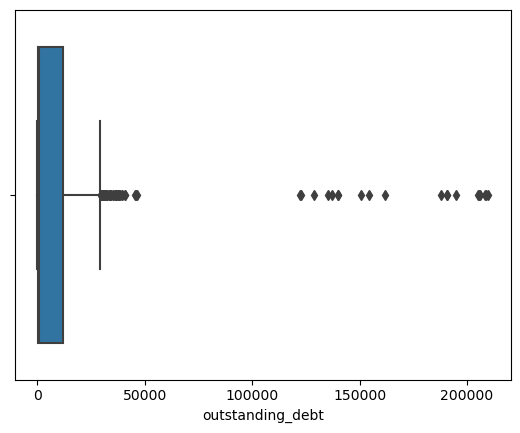

In [100]:
sns.boxplot(x = df_cs_clean_3.outstanding_debt)

In [101]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt > df_cs_clean_3.credit_limit] 

cust_id  credit_score  credit_utilisation  outstanding_debt  \
1          2           587            0.107928          161644.0   
19        20           647            0.439132          205014.0   
25        26           758            0.250811          190838.0   
38        39           734            0.573023          122758.0   
93        94           737            0.739948          137058.0   
204      205           303            0.364360          187849.0   
271      272           703            0.446886          154568.0   
301      302           722            0.608076          122402.0   
330      331           799            0.363420          208898.0   
350      351           320            0.285081          150860.0   
446      447           754            0.178394          206191.0   
544      545           764            0.337769          135112.0   
636      637           420            0.323984          140063.0   
646      647           498            0.658087          128818.0   
698      699           775            0.385100          190717.0   
723      724           465            0.658173          140008.0   
725      726           737            0.136048          205404.0   
730      731           626            0.762245          209901.0   
766      767           473            0.611750          195004.0   
862      863           792            0.399555          208406.0   

     credit_inquiries_last_6_months  credit_limit credit_score_range  \
1                               2.0        1250.0            550-599   
19                              3.0        1500.0            600-649   
25                              2.0       60000.0            750-799   
38                              3.0       40000.0            700-749   
93                              2.0       40000.0            700-749   
204                             0.0         500.0            300-449   
271                             1.0       40000.0            700-749   
301                             4.0       40000.0            700-749   
330                             4.0       60000.0            750-799   
350                             0.0         500.0            300-449   
446                             2.0       60000.0            750-799   
544                             2.0       60000.0            750-799   
636                             4.0         500.0            300-449   
646                             3.0         750.0            450-499   
698                             2.0       60000.0            750-799   
723                             3.0         750.0            450-499   
725                             4.0       40000.0            700-749   
730                             2.0        1500.0            600-649   
766                             1.0         750.0            450-499   
862                             3.0       60000.0            750-799   

     credit_limit_mode  
1               1250.0  
19              1500.0  
25             60000.0  
38             40000.0  
93             40000.0  
204              500.0  
271            40000.0  
301            40000.0  
330            60000.0  
350              500.0  
446            60000.0  
544            60000.0  
636              500.0  
646              750.0  
698            60000.0  
723              750.0  
725            40000.0  
730             1500.0  
766              750.0  
862            60000.0

In [102]:
df_cs_clean_3.loc[df_cs_clean_3.outstanding_debt > df_cs_clean_3.credit_limit , 'outstanding_debt'] = df_cs_clean_3['credit_limit']

In [103]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt > df_cs_clean_3.credit_limit] 

Empty DataFrame
Columns: [cust_id, credit_score, credit_utilisation, outstanding_debt, credit_inquiries_last_6_months, credit_limit, credit_score_range, credit_limit_mode]
Index: []

In [104]:
df_cs_clean_3.loc[[1,19]]  #spot checking the values

cust_id  credit_score  credit_utilisation  outstanding_debt  \
1         2           587            0.107928            1250.0   
19       20           647            0.439132            1500.0   

    credit_inquiries_last_6_months  credit_limit credit_score_range  \
1                              2.0        1250.0            550-599   
19                             3.0        1500.0            600-649   

    credit_limit_mode  
1              1250.0  
19             1500.0

## BIVARIATE Analysis

In [106]:
df_cs_clean_3.head()

cust_id  credit_score  credit_utilisation  outstanding_debt  \
0        1           749            0.585171           19571.0   
1        2           587            0.107928            1250.0   
2        3           544            0.854807             513.0   
3        4           504            0.336938             224.0   
4        5           708            0.586151           18090.0   

   credit_inquiries_last_6_months  credit_limit credit_score_range  \
0                             0.0       40000.0            700-749   
1                             2.0        1250.0            550-599   
2                             4.0        1000.0            500-549   
3                             2.0        1000.0            500-549   
4                             2.0       40000.0            700-749   

   credit_limit_mode  
0            40000.0  
1             1250.0  
2             1000.0  
3             1000.0  
4            40000.0

In [107]:
df_cust.head()

cust_id            name  gender   age location      occupation  \
0        1   Manya Acharya  Female  51.0     City  Business Owner   
1        2   Anjali Pandey  Female  47.0     City      Consultant   
2        3  Aaryan Chauhan    Male  21.0     City      Freelancer   
3        4      Rudra Bali    Male  24.0    Rural      Freelancer   
4        5    Advait Malik    Male  48.0     City      Consultant   

   annual_income marital_status age_group  
0       358211.0        Married     49-65  
1        65172.0         Single     26-48  
2        22378.0        Married     18-25  
3        33563.0        Married     18-25  
4        39406.0        Married     26-48

In [108]:
df_merged = df_cust.merge(df_cs_clean_3 , on = "cust_id" , how = "inner")
df_merged.head()

cust_id            name  gender   age location      occupation  \
0        1   Manya Acharya  Female  51.0     City  Business Owner   
1        2   Anjali Pandey  Female  47.0     City      Consultant   
2        3  Aaryan Chauhan    Male  21.0     City      Freelancer   
3        4      Rudra Bali    Male  24.0    Rural      Freelancer   
4        5    Advait Malik    Male  48.0     City      Consultant   

   annual_income marital_status age_group  credit_score  credit_utilisation  \
0       358211.0        Married     49-65           749            0.585171   
1        65172.0         Single     26-48           587            0.107928   
2        22378.0        Married     18-25           544            0.854807   
3        33563.0        Married     18-25           504            0.336938   
4        39406.0        Married     26-48           708            0.586151   

   outstanding_debt  credit_inquiries_last_6_months  credit_limit  \
0           19571.0                             0.0       40000.0   
1            1250.0                             2.0        1250.0   
2             513.0                             4.0        1000.0   
3             224.0                             2.0        1000.0   
4           18090.0                             2.0       40000.0   

  credit_score_range  credit_limit_mode  
0            700-749            40000.0  
1            550-599             1250.0  
2            500-549             1000.0  
3            500-549             1000.0  
4            700-749            40000.0

In [109]:
numerical_cols = ['credit_score','credit_limit','credit_utilisation','outstanding_debt','annual_income','age']
correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

credit_score  credit_limit  credit_utilisation  \
credit_score            1.000000      0.847951           -0.070445   
credit_limit            0.847951      1.000000           -0.080504   
credit_utilisation     -0.070445     -0.080504            1.000000   
outstanding_debt        0.680654      0.810581            0.192838   
annual_income           0.575685      0.684633           -0.086816   
age                     0.444917      0.510980           -0.027713   

                    outstanding_debt  annual_income       age  
credit_score                0.680654       0.575685  0.444917  
credit_limit                0.810581       0.684633  0.510980  
credit_utilisation          0.192838      -0.086816 -0.027713  
outstanding_debt            1.000000       0.555077  0.444301  
annual_income               0.555077       1.000000  0.618136  
age                         0.444301       0.618136  1.000000

In [110]:
correlation_matrix.columns = correlation_matrix.columns.str.strip()
correlation_matrix.index = correlation_matrix.index.str.strip()


In [111]:
print(correlation_matrix)
print(correlation_matrix.columns)


                    credit_score  credit_limit  credit_utilisation  \
credit_score            1.000000      0.847951           -0.070445   
credit_limit            0.847951      1.000000           -0.080504   
credit_utilisation     -0.070445     -0.080504            1.000000   
outstanding_debt        0.680654      0.810581            0.192838   
annual_income           0.575685      0.684633           -0.086816   
age                     0.444917      0.510980           -0.027713   

                    outstanding_debt  annual_income       age  
credit_score                0.680654       0.575685  0.444917  
credit_limit                0.810581       0.684633  0.510980  
credit_utilisation          0.192838      -0.086816 -0.027713  
outstanding_debt            1.000000       0.555077  0.444301  
annual_income               0.555077       1.000000  0.618136  
age                         0.444301       0.618136  1.000000  
Index(['credit_score', 'credit_limit', 'credit_utilisation',


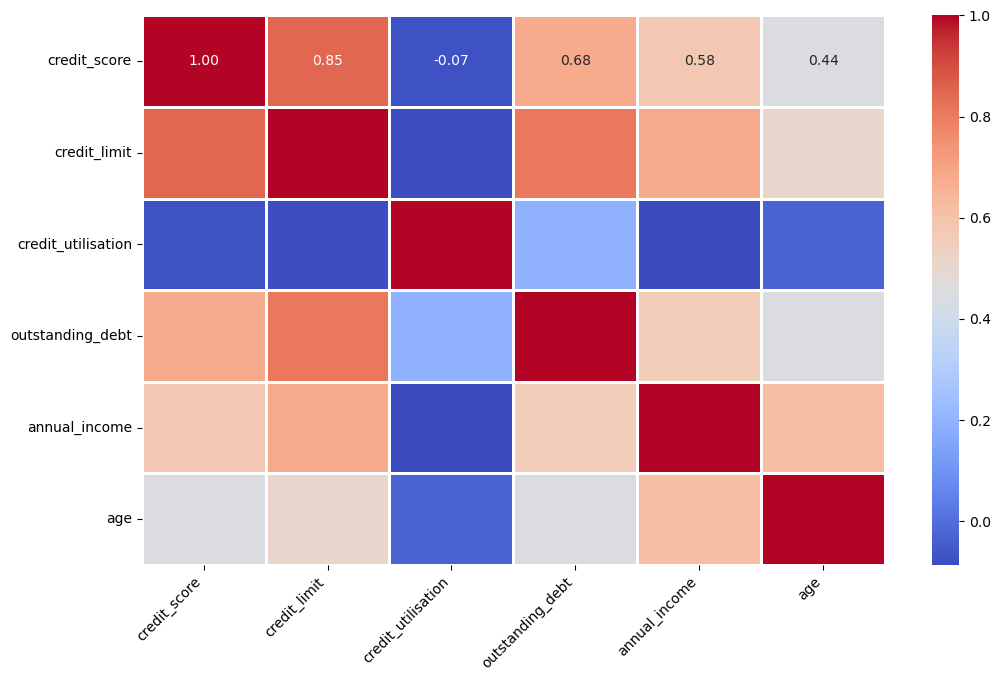

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size for better visibility
plt.figure(figsize=(12, 8))

# Plot heatmap with annotations and proper label formatting
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)

# Rotate the x-axis labels and align them
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Adjust layout to fit labels properly
plt.tight_layout(pad = 5)

plt.show()


## Transaction Data

In [114]:
df_trans.head()

tran_id  cust_id   tran_date  tran_amount  platform   product_category  \
0        1      705  2023-01-01           63  Flipkart        Electronics   
1        2      385  2023-01-01           99   Alibaba  Fashion & Apparel   
2        3      924  2023-01-01          471   Shopify             Sports   
3        4      797  2023-01-01           33   Shopify  Fashion & Apparel   
4        5      482  2023-01-01           68    Amazon  Fashion & Apparel   

  payment_type  
0      Phonepe  
1  Credit Card  
2      Phonepe  
3         Gpay  
4  Net Banking

In [115]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [116]:
df_trans.describe()

tran_id        cust_id   tran_amount
count  500000.000000  500000.000000  500000.00000
mean   250000.500000     501.400428    3225.20733
std    144337.711634     288.641924   13098.74276
min         1.000000       1.000000       0.00000
25%    125000.750000     252.000000      64.00000
50%    250000.500000     502.000000     141.00000
75%    375000.250000     752.000000     397.00000
max    500000.000000    1000.000000   69999.00000

In [117]:
df_trans[df_trans.platform.isnull()]

tran_id  cust_id   tran_date  tran_amount platform   product_category  \
355         356       58  2023-01-01          237     None        Electronics   
418         419      383  2023-01-01          338     None        Electronics   
607         608      421  2023-01-01          700     None        Electronics   
844         845      945  2023-01-01          493     None             Sports   
912         913      384  2023-01-01           85     None  Fashion & Apparel   
...         ...      ...         ...          ...      ...                ...   
499579   499580      924  2023-09-05           31     None  Fashion & Apparel   
499646   499647      944  2023-09-05        58445     None  Fashion & Apparel   
499725   499726      620  2023-09-05           15     None             Sports   
499833   499834      616  2023-09-05           97     None  Fashion & Apparel   
499997   499998       57  2023-09-05          224     None   Garden & Outdoor   

       payment_type  
355     Net Banking  
418     Credit Card  
607         Phonepe  
844     Credit Card  
912         Phonepe  
...             ...  
499579         Gpay  
499646      Phonepe  
499725  Net Banking  
499833  Credit Card  
499997      Phonepe  

[4941 rows x 7 columns]

In [118]:
distinct_occupations = df_trans["platform"].unique()
print(distinct_occupations)

['Flipkart' 'Alibaba' 'Shopify' 'Amazon' 'Ebay' 'Meesho' 'Cred' None]


<Axes: xlabel='count', ylabel='product_category'>

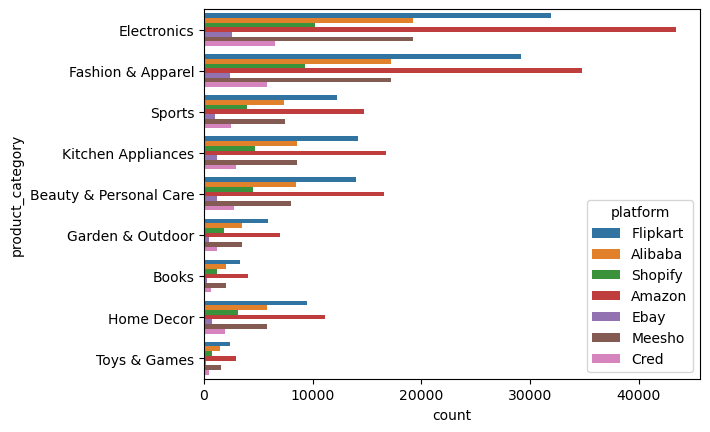

In [119]:
# We can replace None with mode value from platform column
sns.countplot(y = "product_category" ,hue = "platform" ,  data = df_trans)

In [120]:
df_trans.platform.mode()[0]

'Amazon'

In [121]:
df_trans.platform.fillna(df_trans.platform.mode()[0] , inplace = True) 
#replacing null values with the mode value

In [122]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [123]:
df_trans.describe()

tran_id        cust_id   tran_amount
count  500000.000000  500000.000000  500000.00000
mean   250000.500000     501.400428    3225.20733
std    144337.711634     288.641924   13098.74276
min         1.000000       1.000000       0.00000
25%    125000.750000     252.000000      64.00000
50%    250000.500000     502.000000     141.00000
75%    375000.250000     752.000000     397.00000
max    500000.000000    1000.000000   69999.00000

In [124]:
df_trans_zero = df_trans[df_trans.tran_amount == 0]
df_trans_zero

tran_id  cust_id   tran_date  tran_amount platform product_category  \
120         121      440  2023-01-01            0   Amazon      Electronics   
141         142      839  2023-01-01            0   Amazon      Electronics   
517         518      147  2023-01-01            0   Amazon      Electronics   
533         534      891  2023-01-01            0   Amazon      Electronics   
586         587      108  2023-01-01            0   Amazon      Electronics   
...         ...      ...         ...          ...      ...              ...   
499326   499327      695  2023-09-05            0   Amazon      Electronics   
499494   499495      295  2023-09-05            0   Amazon      Electronics   
499708   499709      141  2023-09-05            0   Amazon      Electronics   
499928   499929        4  2023-09-05            0   Amazon      Electronics   
499972   499973      224  2023-09-05            0   Amazon      Electronics   

       payment_type  
120     Credit Card  
141     Credit Card  
517     Credit Card  
533     Credit Card  
586     Credit Card  
...             ...  
499326  Credit Card  
499494  Credit Card  
499708  Credit Card  
499928  Credit Card  
499972  Credit Card  

[4734 rows x 7 columns]

In [125]:
df_trans_zero.shape

(4734, 7)

In [126]:
df_trans_zero[["platform","product_category","payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [127]:
df_trans_1 = df_trans[(df_trans.platform == 'Amazon') & (df_trans.product_category == "Electronics") & (df_trans.payment_type == "Credit Card")]
df_trans_1.head()

tran_id  cust_id   tran_date  tran_amount platform product_category  \
109      110      887  2023-01-01          635   Amazon      Electronics   
120      121      440  2023-01-01            0   Amazon      Electronics   
141      142      839  2023-01-01            0   Amazon      Electronics   
173      174      676  2023-01-01        60439   Amazon      Electronics   
190      191      763  2023-01-01          697   Amazon      Electronics   

    payment_type  
109  Credit Card  
120  Credit Card  
141  Credit Card  
173  Credit Card  
190  Credit Card

In [128]:
median_to_replace = df_trans_1[df_trans_1.tran_amount > 0].tran_amount.median()
median_to_replace

554.0

In [129]:
df_trans['tran_amount'].replace(0,median_to_replace, inplace = True)

In [130]:
df_trans.describe()

tran_id        cust_id    tran_amount
count  500000.000000  500000.000000  500000.000000
mean   250000.500000     501.400428    3230.452602
std    144337.711634     288.641924   13097.561071
min         1.000000       1.000000       2.000000
25%    125000.750000     252.000000      66.000000
50%    250000.500000     502.000000     146.000000
75%    375000.250000     752.000000     413.000000
max    500000.000000    1000.000000   69999.000000

<Axes: xlabel='tran_amount', ylabel='Count'>

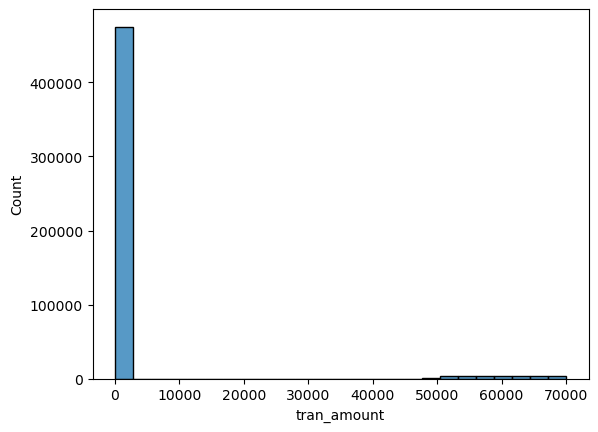

In [131]:
sns.histplot(df_trans.tran_amount , bins = 25)

<Axes: xlabel='tran_amount', ylabel='Count'>

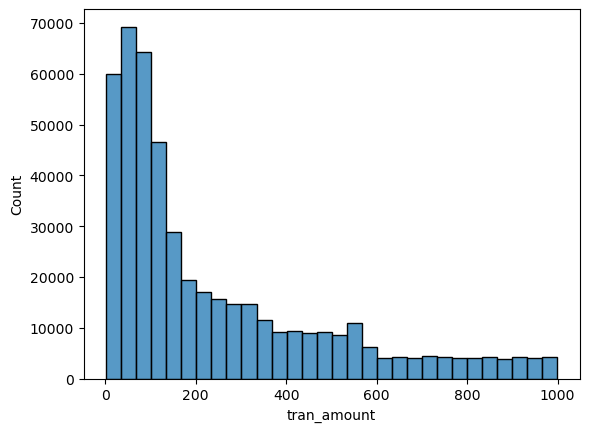

In [132]:
sns.histplot(df_trans[df_trans.tran_amount < 10000].tran_amount , bins = 30)

In [133]:
#this is skewed distribution that's why IQR is recommended to treat outliers

Q1,Q3 =  df_trans['tran_amount'].quantile([0.25,0.75])

IQR = Q3 - Q1

Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

Lower,Upper

(-454.5, 933.5)

In [134]:
df_trans.head()

tran_id  cust_id   tran_date  tran_amount  platform   product_category  \
0        1      705  2023-01-01           63  Flipkart        Electronics   
1        2      385  2023-01-01           99   Alibaba  Fashion & Apparel   
2        3      924  2023-01-01          471   Shopify             Sports   
3        4      797  2023-01-01           33   Shopify  Fashion & Apparel   
4        5      482  2023-01-01           68    Amazon  Fashion & Apparel   

  payment_type  
0      Phonepe  
1  Credit Card  
2      Phonepe  
3         Gpay  
4  Net Banking

In [136]:
df_cust.head()

cust_id            name  gender   age location      occupation  \
0        1   Manya Acharya  Female  51.0     City  Business Owner   
1        2   Anjali Pandey  Female  47.0     City      Consultant   
2        3  Aaryan Chauhan    Male  21.0     City      Freelancer   
3        4      Rudra Bali    Male  24.0    Rural      Freelancer   
4        5    Advait Malik    Male  48.0     City      Consultant   

   annual_income marital_status age_group  
0       358211.0        Married     49-65  
1        65172.0         Single     26-48  
2        22378.0        Married     18-25  
3        33563.0        Married     18-25  
4        39406.0        Married     26-48

In [137]:
df_merged_2 = pd.merge(df_merged , df_trans , on = "cust_id" , how = "inner")
df_merged_2.head()

cust_id           name  gender   age location      occupation  \
0        1  Manya Acharya  Female  51.0     City  Business Owner   
1        1  Manya Acharya  Female  51.0     City  Business Owner   
2        1  Manya Acharya  Female  51.0     City  Business Owner   
3        1  Manya Acharya  Female  51.0     City  Business Owner   
4        1  Manya Acharya  Female  51.0     City  Business Owner   

   annual_income marital_status age_group  credit_score  ...  \
0       358211.0        Married     49-65           749  ...   
1       358211.0        Married     49-65           749  ...   
2       358211.0        Married     49-65           749  ...   
3       358211.0        Married     49-65           749  ...   
4       358211.0        Married     49-65           749  ...   

   credit_inquiries_last_6_months  credit_limit  credit_score_range  \
0                             0.0       40000.0             700-749   
1                             0.0       40000.0             700-749   
2                             0.0       40000.0             700-749   
3                             0.0       40000.0             700-749   
4                             0.0       40000.0             700-749   

   credit_limit_mode tran_id   tran_date  tran_amount  platform  \
0            40000.0    1283  2023-01-01           30   Shopify   
1            40000.0    1382  2023-01-01           96    Amazon   
2            40000.0    1521  2023-01-01           86    Meesho   
3            40000.0    1576  2023-01-01          149    Amazon   
4            40000.0    1757  2023-01-01           37  Flipkart   

         product_category payment_type  
0       Fashion & Apparel  Net Banking  
1                  Sports   Debit Card  
2        Garden & Outdoor         Gpay  
3  Beauty & Personal Care      Phonepe  
4       Fashion & Apparel  Credit Card  

[5 rows x 22 columns]

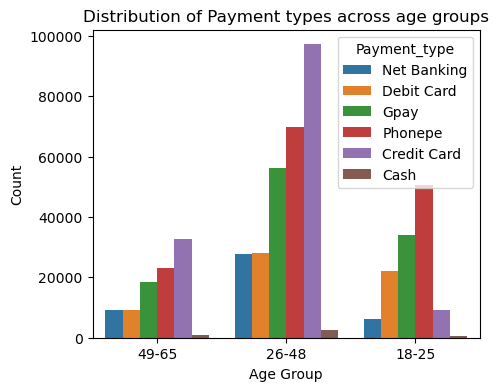

In [138]:
plt.figure(figsize = (5,4))
sns.countplot( x = 'age_group' , hue =  'payment_type' , data = df_merged_2)
plt.title('Distribution of Payment types across age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title = 'Payment_type' , loc = 'upper right')
plt.show()

<Axes: xlabel='age_group', ylabel='count'>

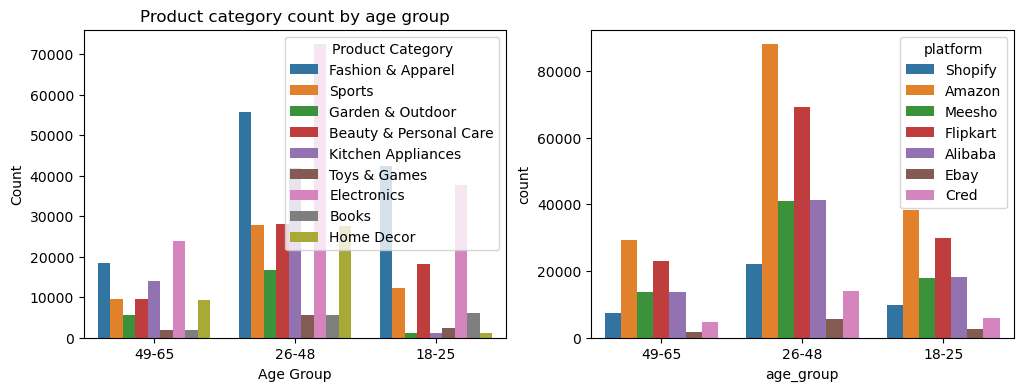

In [139]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,4))
sns.countplot( x = 'age_group' , hue =  'product_category' , data = df_merged_2 , ax = ax1)
ax1.set_title('Product category count by age group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.legend(title = "Product Category" , loc = 'upper right')
sns.countplot(x = 'age_group' , hue = "platform" , data = df_merged_2 , ax = ax2)

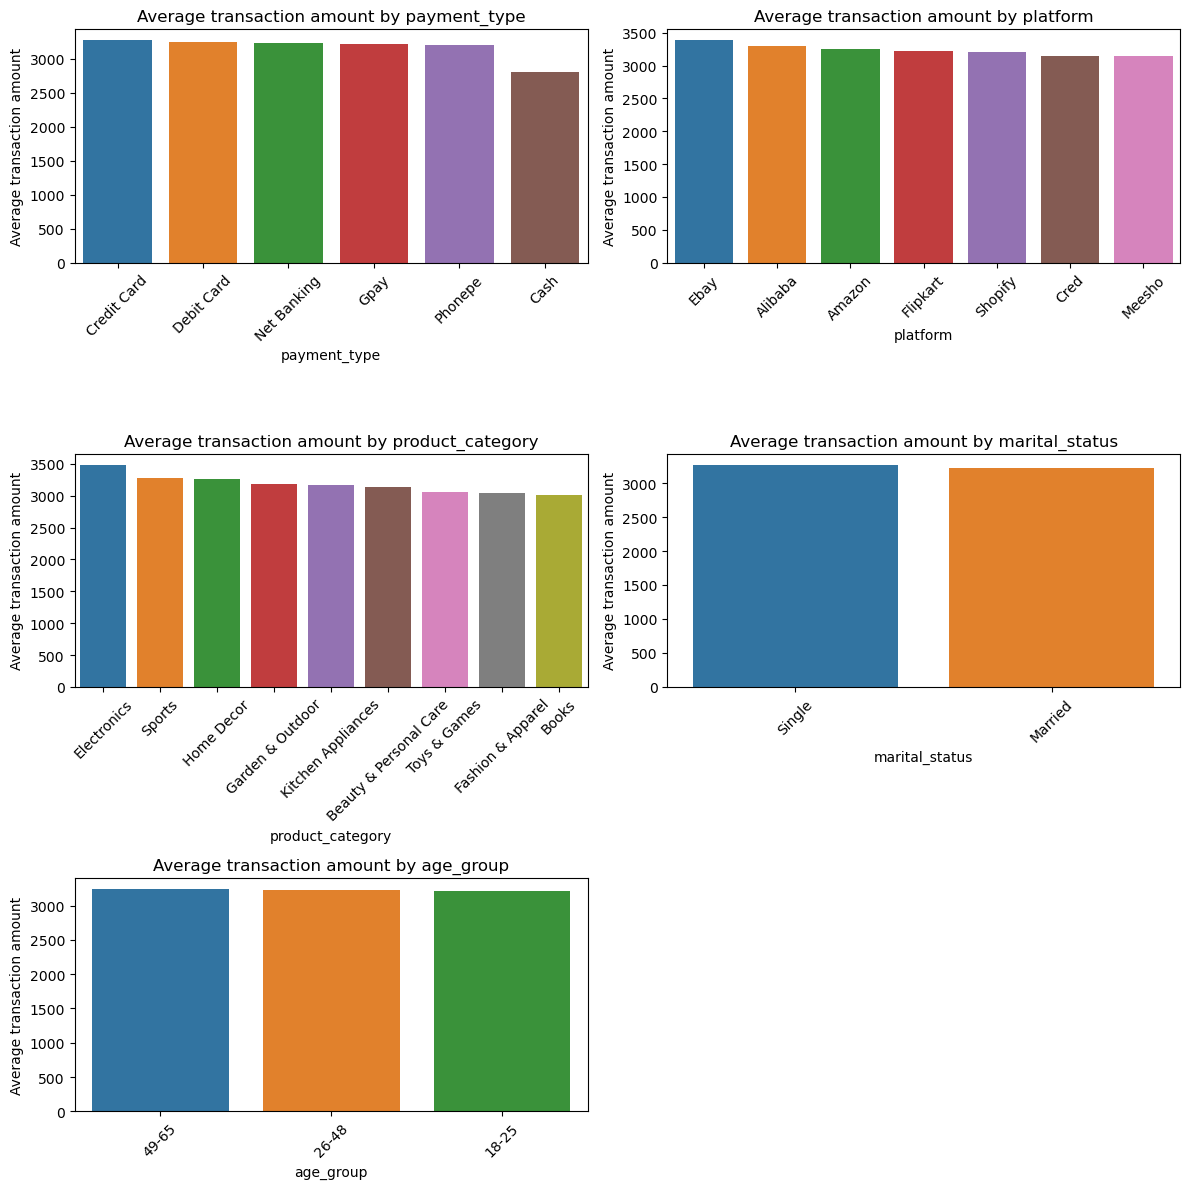

In [140]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [141]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

age_group  annual_income  credit_limit  credit_score
0     18-25   36969.670732   1130.081301    484.451220
1     26-48  146133.858541  20734.430605    598.261566
2     49-65  259786.192513  41699.197861    701.524064

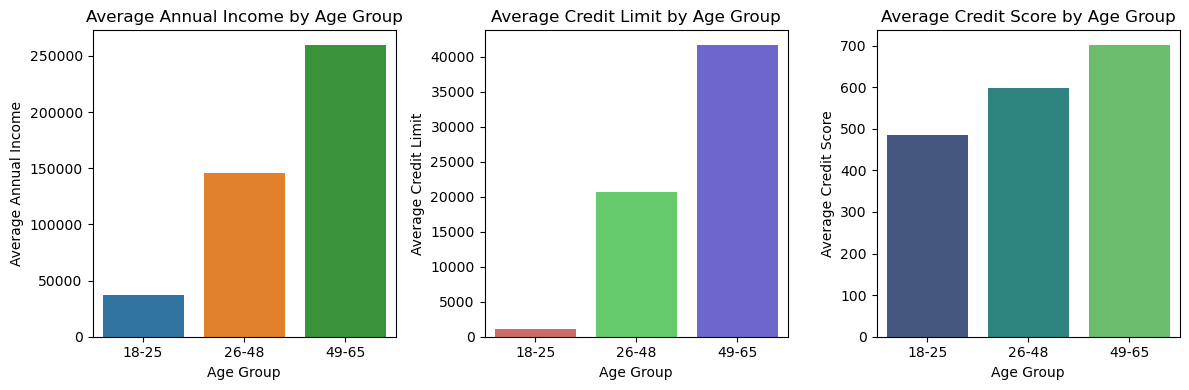

In [142]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [143]:
#After analyzing the data , we figured out to target the 18-25 age group 

### Campaign Planning

In [145]:
# Set the target and Control Group

### Execute Campaign

In [147]:
# Launch campaign for specific customers

<h2 align="center" style="color:purple">Phase 2: AtliQ0 Bank Credit Card Project</h2>

## Insights related to 18-25 age group market :-

1. Average salary of this age group is less than 50k.

2. Credit limit for this age group is very less as compared to other age groups.

3. This age group has less than 500 credit score.

4. Usage of credit card is very low as compared to other payment method

5. Cash is the lowest payment type as compared to other payment methods

## (1) Pre-Campaign

We want to do a trial run for our new credit card. For this we need to figure out (1) How many customers do we need for our A/B 
testing.We will form a control and test group. For both of these groups we can figure out number of customers we need based on
the statistical power and effect size that we agree upon after discussing with business. We will use 

In [156]:
#import required libraries
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [157]:
alpha = 0.05
power = 0.8
effect_size=0.2

sms.tt_ind_solve_power(
    effect_size=0.2, 
    alpha=alpha, 
    power=power, 
    ratio=1, 
    alternative='two-sided'
)

393.4056989990335

#### We need to launch the campaigns for 393 people as per the power , but we have to reduce the number of customer as per the budget constraints. So we will try to operate with different effect sizes and we will not change the power because it can increase the risk to detect a true effect.

In [159]:
# Calculate the required sample size for different effect sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]  #  standard deviations greater than control group 

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 1, Required Sample Size: 16 customers


Based on the business recquirements, we will try to negotiate to implement the effect size of 0.4 which will provide us the 100 sufficient customers for the campaign launch for Control & Test groups and will be under the budget.

At the end of the 2-month campaign period (from 09-10-23 to 11-10-23), we obtained daily data showing the average transaction amounts made by the entire group of 40 customers in both the control and test groups using existing and newly launched credit cards respectively

The key performance indicator (KPI) for this AB test aims to enhance average transaction amounts facilitated by the new card

#### Forming control and test groups

1.We have identified approximately 246 customers within the age group of 18 to 25. From this pool, we will select 100 customers for the initial campaign launch.

2.The campaign is launched for 100 customers, as determined by the effective size calculation and by considering budgeting costs, and will run campaign for a duration of 2 months

3.Got a conversion rate of ~40% ( implies 40 out of 100 customers in test group started using credit card)

4.To maintain a similar sample size, a control group consisting of 40 customers will be created. Importantly, this control group will be completely exclusive of initial 100 customers used as test group.

5.So now we have 40 customers in each of control and test groups

## POST CAMPAIGN

In [163]:
#Load campaign data
df = pd.read_csv(r"C:\Users\USER\Downloads\CODEBASICS\STATISTICS\CH 11\chapter11_assets\data\avg_transactions_after_campaign.csv")
df.head()

campaign_date  control_group_avg_tran  test_group_avg_tran
0    2023-09-10                  259.83               277.32
1    2023-09-11                  191.27               248.68
2    2023-09-12                  212.41               286.61
3    2023-09-13                  214.92               214.85
4    2023-09-14                  158.55               344.08

In [164]:
df.shape

(62, 3)

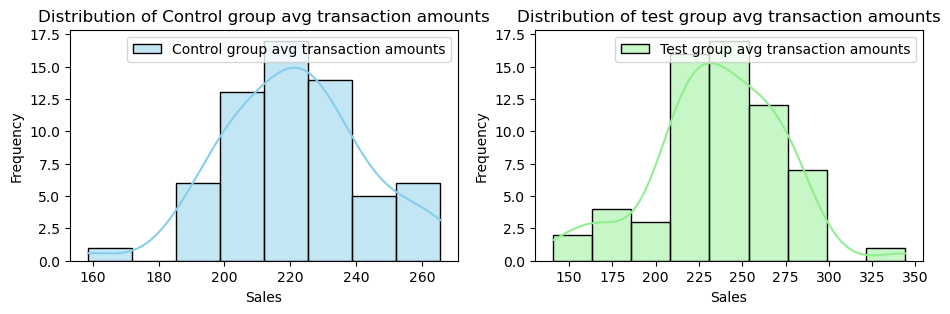

In [165]:
# Let's look at distributions of avg transactions amounts in both groups
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

# Plot the distribution of Campaign A Sales
sns.histplot(df['control_group_avg_tran'], kde=True, color='skyblue', label='Control group avg transaction amounts', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Control group avg transaction amounts')
ax1.legend()

# Plot the distribution of Campaign B Sales
sns.histplot(df['test_group_avg_tran'], kde=True, color='lightgreen', label='Test group avg transaction amounts', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of test group avg transaction amounts')
ax2.legend()

# Show the plots
plt.show()

### The graph for both Control and Test group forms a normal distribution curve.

In [167]:
# Data Exploration :-

On how many days Avg transaction amount for control group was more than test group ?

In [169]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']]

campaign_date  control_group_avg_tran  test_group_avg_tran
3     2023-09-13                  214.92               214.85
8     2023-09-18                  265.13               212.60
9     2023-09-19                  232.88               207.63
16    2023-09-26                  222.95               213.30
22    2023-10-02                  238.39               203.10
23    2023-10-03                  253.95               234.26
25    2023-10-05                  239.47               216.37
26    2023-10-06                  200.70               166.70
27    2023-10-07                  200.91               170.01
28    2023-10-08                  188.30               150.27
29    2023-10-09                  247.11               164.00
35    2023-10-15                  240.27               238.30
39    2023-10-19                  223.90               196.84
44    2023-10-24                  230.83               213.45
48    2023-10-28                  229.18               222.29
49    2023-10-29                  237.26               214.46
52    2023-11-01                  265.45               169.98
57    2023-11-06                  255.70               140.61

In [170]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']].shape

(18, 3)

In [171]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']].shape[0] / df.shape[0]

0.2903225806451613

In [172]:
# On 29% of days , control group is performing better than test group

#### Perform Hypothesis Testing Using Two Sample Z-test

Null-hypothesis :- New credit card is not as effective as old credit card.    

Alternate-hypothesis :- New credit card is working very well.

In [174]:
control_mean = df["control_group_avg_tran"].mean().round(2)
control_std = df["control_group_avg_tran"].std()
control_mean, control_std

(221.18, 21.359192112027014)

In [175]:
test_mean = df["test_group_avg_tran"].mean().round(2)
test_std = df["test_group_avg_tran"].std()
test_mean, test_std

(235.98, 36.65808210918637)

In [176]:
# Since test_mean > control_mean , we have a hope that new Credit card is working better.

In [177]:
sample_size = df.shape[0]
sample_size

62

### Test Using Rejection Region (i.e. Critical Z Value)

In [204]:
a = (control_std**2/sample_size)
b = (test_std**2/sample_size)

Z_score = (test_mean-control_mean)/np.sqrt(a+b)
Z_score

2.7467408082871687

In [207]:
critical_z_value = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level
critical_z_value

1.6448536269514722

In [212]:
Z_score > critical_z_value

True

Since Z_Score is greater than Critical Z value, we can reject the null hypothesis.

### Test Using p-Value

In [216]:
p_value = 1 - st.norm.cdf(Z_score)
p_value

0.003009534061359953

In [218]:
alpha 

0.05

Since p_value < alpha , we can reject the null hypothesis.

In [225]:
# Performing Z-test with above considerations
z_statistic, p_value = sm.stats.ztest( df['test_group_avg_tran'],df['control_group_avg_tran'],alternative = 'larger')
z_statistic, p_value

(2.7482973745691135, 0.002995282462202502)

In [227]:
# Calculating the 95 % confidence intervals for test group.
test_group_CI = st.norm.interval(0.95 , loc = test_mean , scale = test_std/np.sqrt(sample_size))
test_group_CI

(226.85522874933187, 245.1047712506681)

By calculating the confidence interval, we can predict that On average customers are going to spend 226-245 per transaction in a new credit card.